# Система автоматизированного выбора и настройки алгоритма классификации задачи кредитного скоринга

## Загрузка и анализ данных

### Загрузка библиотек, датасета для кредитного скоринга

Библиотеки:
* pandas
* sklearn
* kagglehub
* matplotlib
* seaborn
* tpot
* h20

In [371]:
import warnings
warnings.filterwarnings("ignore")

In [372]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn import utils
from sklearn.metrics import(
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [373]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kornilovag94/bank-credit-default-loan-default")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\AntMur00\.cache\kagglehub\datasets\kornilovag94\bank-credit-default-loan-default\versions\2


In [374]:
data = pd.read_parquet(path+'/data/train_data/train_data_0.pq')

In [375]:
dataset_count=len(data)
print(f"Количество записей в первом файле датасета: {dataset_count}")

Количество записей в первом файле датасета: 1974724


In [376]:
import os
i = 1
while os.path.isfile(path+f'/data/train_data/train_data_{i}.pq'):
    temp_path = path+f'/data/train_data/train_data_{i}.pq'
    data_temp = len(pd.read_parquet(temp_path))
    dataset_count += data_temp
    i+=1
print(f"Общее количество записей в датасете: {dataset_count}")

Общее количество записей в датасете: 26162717


In [377]:
pd.set_option('display.max_columns', None)
data.head()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,3,4,1,0,0
2,0,3,18,9,4,8,1,11,11,0,5,0,2,8,6,16,5,4,8,1,1,1,1,1,15,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,2,3,1,1,1
3,0,4,4,1,9,12,16,7,12,2,3,0,2,4,6,16,5,4,8,0,1,1,1,1,16,2,17,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,1,1,0,0
4,0,5,5,12,15,2,11,12,10,2,3,0,2,4,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0


In [378]:
pd.reset_option('display.max_columns')

### Признаки



id - identifier of the application  
rn - sequence number of the credit product in the credit history  
pre_since_opened - days from credit opening date to data collection date  
pre_since_confirmed - days from credit information confirmation date till data collection date  
pre_pterm - planned number of days from credit opening date to closing date  
pre_fterm - actual number of days from credit opening date to closing date  
pre_till_pclose - planned number of days from data collection date until loan closing date  
pre_till_fclose - actual number of days from data collection date until loan closing date  
pre_loans_credit_limit - credit limit  
pre_loans_next_pay_summ - amount of the next loan payment  
pre_loans_outstanding - outstanding loan amount  
pre_loans_total_overdue - current overdue amount  
pre_loans_max_overdue_sum - maximum overdue amount  
pre_loans_credit_cost_rate - total cost of credit  
pre_loans5 - number of delinquencies of up to 5 days  
pre_loans530 - number of delinquencies from 5 to 30 days  
pre_loans3060 - number of delinquencies from 30 to 60 days  
pre_loans6090 - number of delinquencies from 60 to 90 days  
pre_loans90 - number of delinquencies of more than 90 days  
is_zero_loans_5 - flag: no delinquencies of up to 5 days  
is_zero_loans_530 - flag: no delinquencies of 5 to 30 days  
is_zero_loans_3060 - flag: no delinquencies of 30 to 60 days  
is_zero_loans_6090 - flag: no delinquencies of 60 to 90 days  
is_zero_loans90 - flag: no delinquencies of more than 90 days  
pre_util - ratio of outstanding loan amount to credit limit  
pre_over2limit - ratio of currently overdue debt to credit limit  
pre_maxover2limit - ratio of maximum overdue debt to credit limit  
is_zero_util - flag: ratio of outstanding loan amount to credit limit equals 0  
is_zero_over2limit - flag: ratio of current overdue debt to credit limit equals 0  
is_zero_maxover2limit - flag: ratio of maximum overdue debt to credit limit equals 0  
enc_paym_{0…n} - monthly payment statuses of the last n months  
enc_loans_account_holder_type - type of relation to the loan  
enc_loans_credit_status - credit status  
enc_loans_account_cur - currency of the loan  
enc_loans_credit_type - credit type  
pclose_flag - flag: planned number of days from opening date to closing date of the loan  
fclose_flag - flag: actual number of days from credit opening date to closing date undefined

In [379]:
data.shape

(1974724, 61)

In [380]:
data.columns

Index(['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5',
       'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90',
       'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit',
       'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit',
       'is_zero_maxover2limit', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2',
       'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7',
       'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12',
       'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16',
       'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20',
       'enc_paym_21', 

In [381]:
data.loc[:1,['enc_paym_3','enc_loans_account_holder_type','enc_loans_credit_status', 'enc_loans_account_cur', 'enc_loans_credit_type']]


,enc_paym_3,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_account_cur,enc_loans_credit_type
0,3,1,3,1,4
1,0,1,3,1,4


## Предобработка данных

In [382]:
data.drop(columns=['pre_loans_total_overdue','pre_loans_max_overdue_sum','rn','pre_loans_outstanding','enc_paym_0','enc_paym_1', 'enc_paym_2', 'enc_paym_3', 'enc_paym_4', 'enc_paym_5',
       'enc_paym_6', 'enc_paym_7', 'enc_paym_8', 'enc_paym_9', 'enc_paym_10',
       'enc_paym_11', 'enc_paym_12', 'enc_paym_13', 'enc_paym_14',
       'enc_paym_15', 'enc_paym_16', 'enc_paym_17', 'enc_paym_18',
       'enc_paym_19', 'enc_paym_20', 'enc_paym_21', 'enc_paym_22',
       'enc_paym_23', 'enc_paym_24','is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90','enc_loans_account_cur'], inplace=True)

In [383]:
data.dtypes

id                               int64
pre_since_opened                 int64
pre_since_confirmed              int64
pre_pterm                        int64
pre_fterm                        int64
pre_till_pclose                  int64
pre_till_fclose                  int64
pre_loans_credit_limit           int64
pre_loans_next_pay_summ          int64
pre_loans_credit_cost_rate       int64
pre_loans5                       int64
pre_loans530                     int64
pre_loans3060                    int64
pre_loans6090                    int64
pre_loans90                      int64
pre_util                         int64
pre_over2limit                   int64
pre_maxover2limit                int64
is_zero_util                     int64
is_zero_over2limit               int64
is_zero_maxover2limit            int64
enc_loans_account_holder_type    int64
enc_loans_credit_status          int64
enc_loans_credit_type            int64
pclose_flag                      int64
fclose_flag              

In [384]:
data_2 = pd.read_csv(path+'/target.csv')

In [385]:
data_2 = data_2.iloc[:250000]
data_2.head()

,id,flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [386]:
data_2.shape

(250000, 2)

In [387]:
merged_data = pd.merge(data, data_2 , on = 'id')
merged_data.shape

(1974724, 27)

In [388]:
merged_data.drop(columns=['id'], inplace=True)

In [389]:
merged_data.head()

,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_credit_cost_rate,pre_loans5,...,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,pclose_flag,fclose_flag,flag
0,18,9,2,3,16,10,11,3,11,6,...,17,1,1,1,1,3,4,0,0,0
1,18,9,14,14,12,12,0,3,11,6,...,17,1,1,1,1,3,4,0,0,0
2,18,9,4,8,1,11,11,0,8,6,...,17,0,1,1,1,2,3,1,1,0
3,4,1,9,12,16,7,12,2,4,6,...,17,1,1,1,1,3,1,0,0,0
4,5,12,15,2,11,12,10,2,4,6,...,17,1,1,1,1,3,4,0,0,0


In [390]:
merged_data['flag'] = merged_data['pre_since_opened'].apply(lambda x: 1 if x > 10 else 0)

In [391]:
merged_data.isna().sum()

pre_since_opened                 0
pre_since_confirmed              0
pre_pterm                        0
pre_fterm                        0
pre_till_pclose                  0
pre_till_fclose                  0
pre_loans_credit_limit           0
pre_loans_next_pay_summ          0
pre_loans_credit_cost_rate       0
pre_loans5                       0
pre_loans530                     0
pre_loans3060                    0
pre_loans6090                    0
pre_loans90                      0
pre_util                         0
pre_over2limit                   0
pre_maxover2limit                0
is_zero_util                     0
is_zero_over2limit               0
is_zero_maxover2limit            0
enc_loans_account_holder_type    0
enc_loans_credit_status          0
enc_loans_credit_type            0
pclose_flag                      0
fclose_flag                      0
flag                             0
dtype: int64

In [392]:
flag_counts = merged_data['flag'].value_counts()
print("Количество значений в столбце 'flag':")
print(flag_counts)

Количество значений в столбце 'flag':
flag
0    1154627
1     820097
Name: count, dtype: int64


In [393]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
#matplotlib inline

In [394]:
def corr_matrix(corr):
    plt.figure(figsize=(27,27))

    sns.heatmap(corr,cmap='YlGnBu', vmax= 1.0, vmin = -1.0)

    plt.title('Корреляция признаков')
    plt.show()

    corr_df = pd.DataFrame(corr)
    correlation_matrix = corr_df.corr()

    correlation_threshold = 0.7
    highly_correlated_columns = []

    for column in correlation_matrix:
        correlated_columns = correlation_matrix[column][correlation_matrix[column] > correlation_threshold].index.tolist()
        highly_correlated_columns.extend([(column, correlated_column, correlation_matrix[column][correlated_column]) for correlated_column in correlated_columns])
    # Print the highly correlated column pairs
    for pair in highly_correlated_columns:
        if not pair[0]==pair[1]:
            print(f"Columns '{pair[0]}' and '{pair[1]}' are highly correlated: {pair[2]:.3f}")

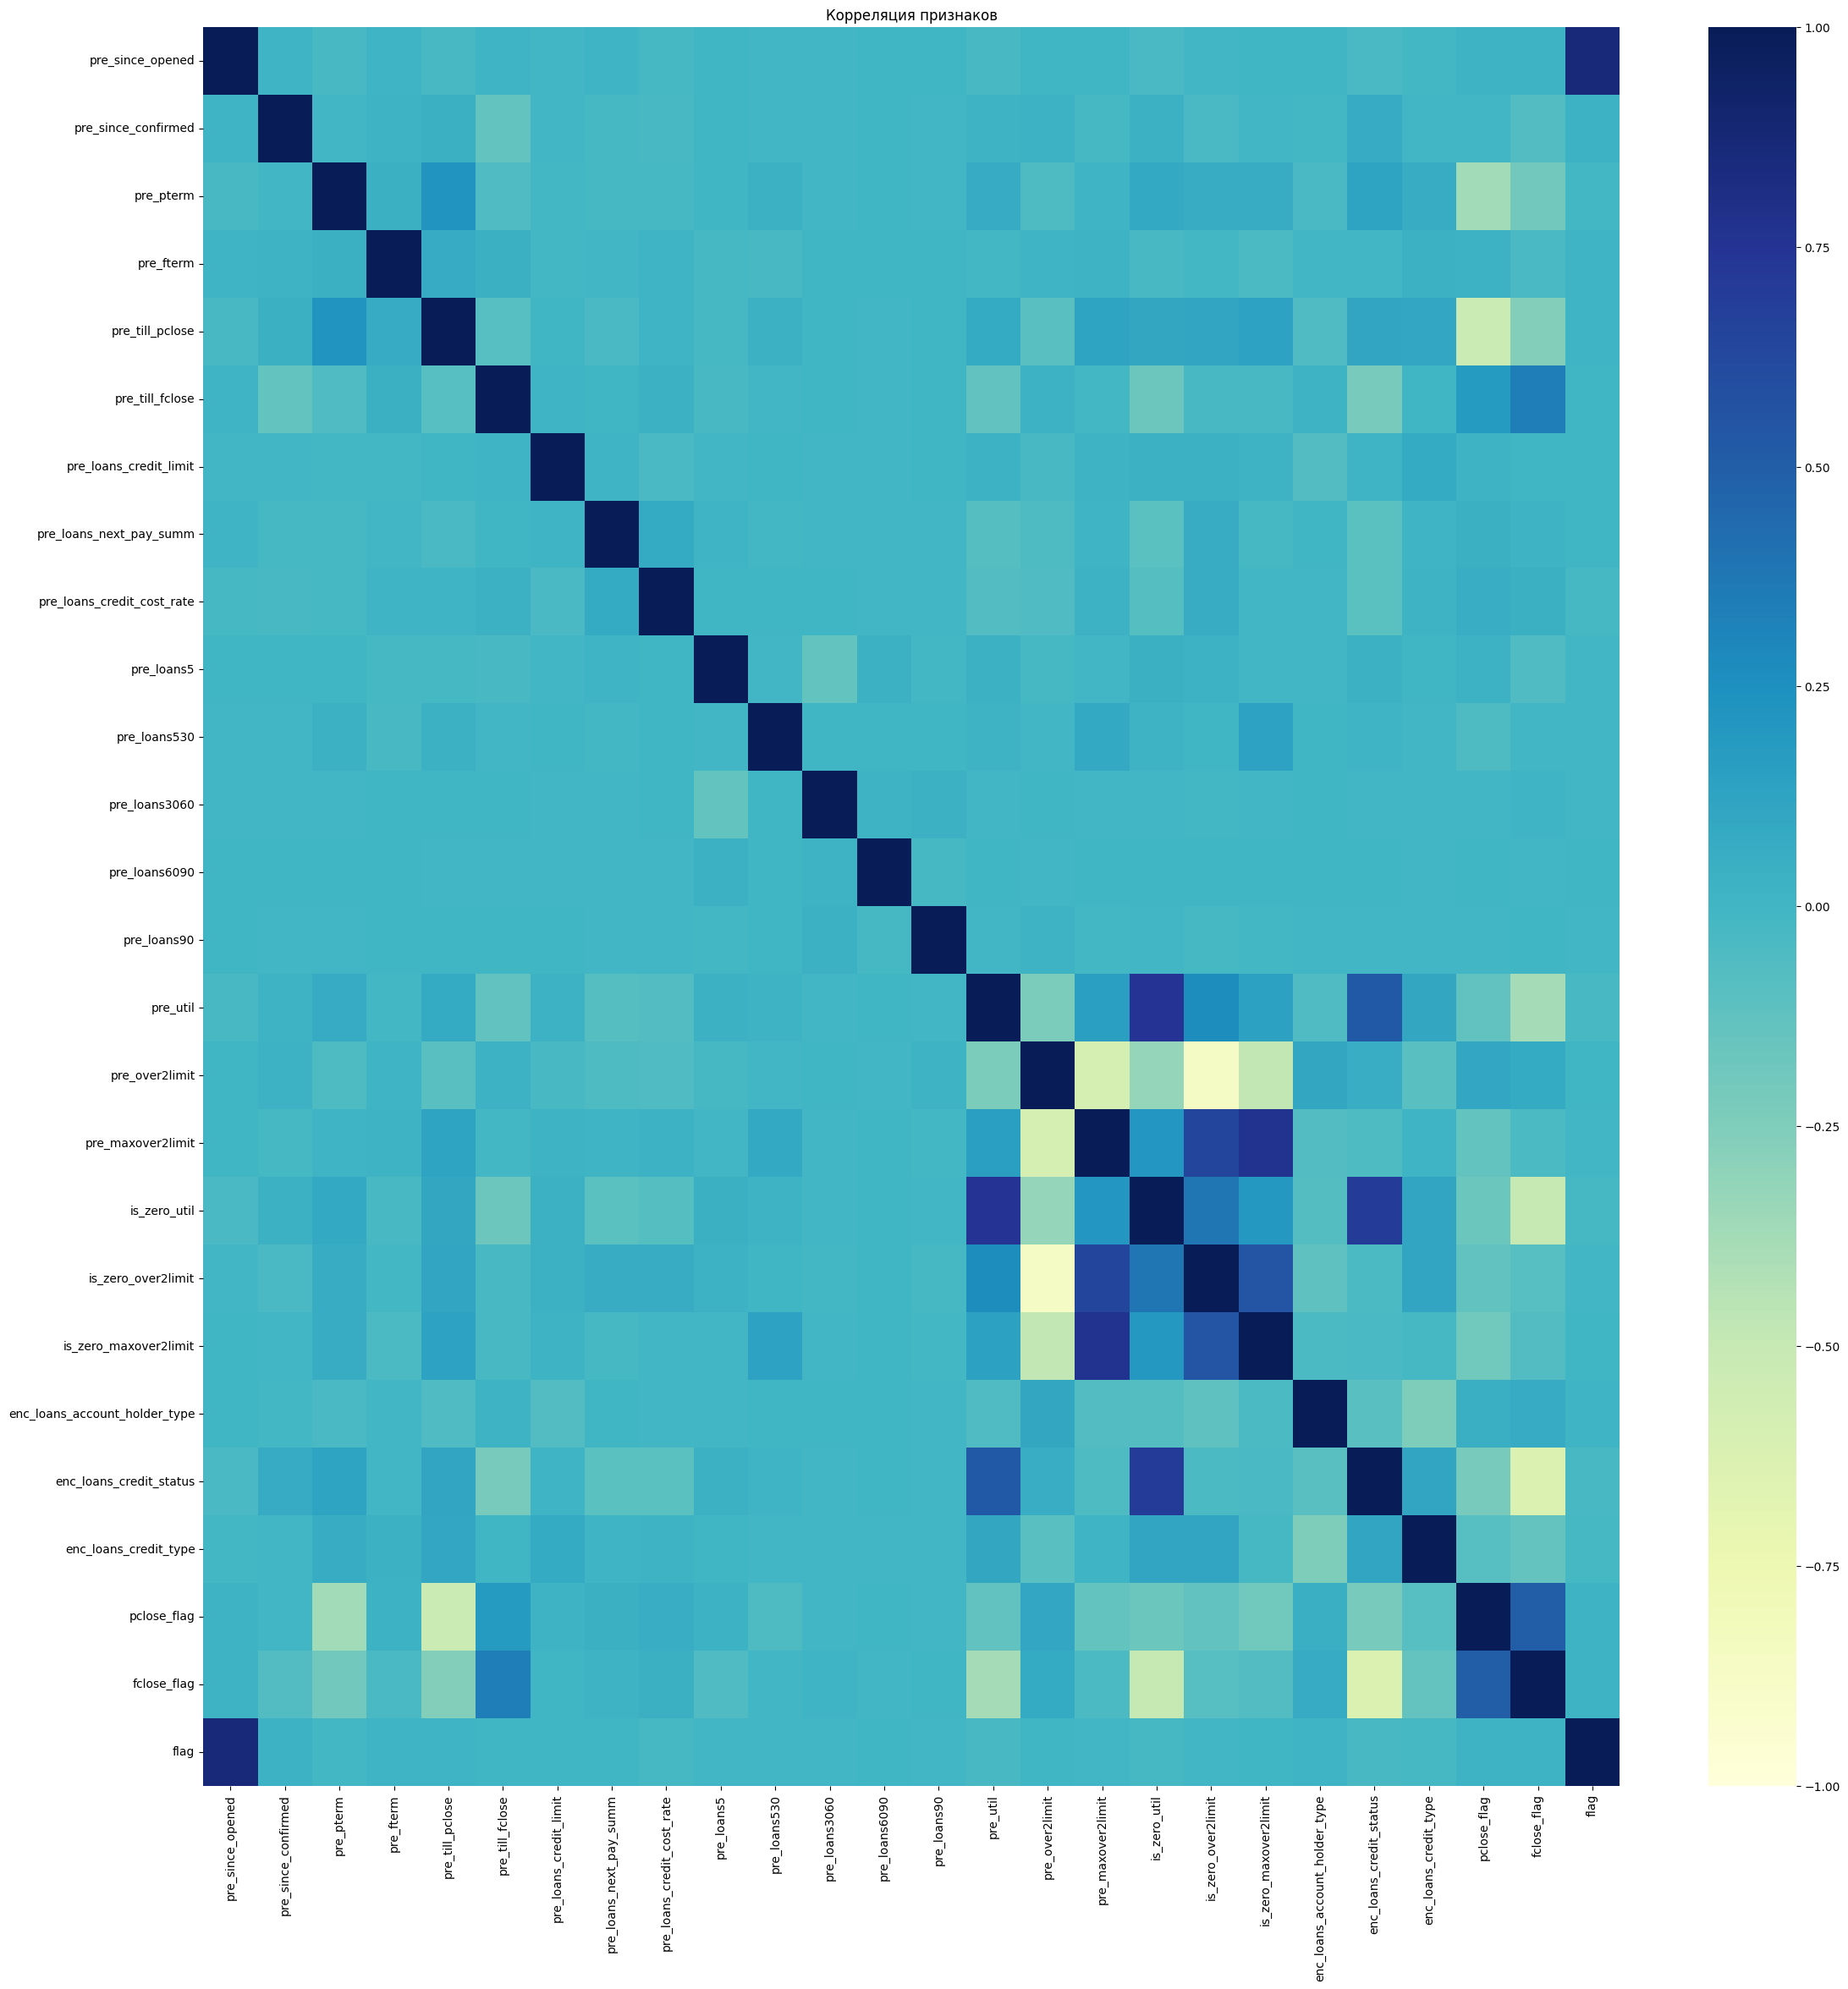

Columns 'pre_since_opened' and 'flag' are highly correlated: 0.988
Columns 'pre_util' and 'is_zero_util' are highly correlated: 0.962
Columns 'pre_util' and 'enc_loans_credit_status' are highly correlated: 0.825
Columns 'pre_maxover2limit' and 'is_zero_over2limit' are highly correlated: 0.910
Columns 'pre_maxover2limit' and 'is_zero_maxover2limit' are highly correlated: 0.968
Columns 'is_zero_util' and 'pre_util' are highly correlated: 0.962
Columns 'is_zero_util' and 'enc_loans_credit_status' are highly correlated: 0.864
Columns 'is_zero_over2limit' and 'pre_maxover2limit' are highly correlated: 0.910
Columns 'is_zero_over2limit' and 'is_zero_maxover2limit' are highly correlated: 0.863
Columns 'is_zero_maxover2limit' and 'pre_maxover2limit' are highly correlated: 0.968
Columns 'is_zero_maxover2limit' and 'is_zero_over2limit' are highly correlated: 0.863
Columns 'enc_loans_credit_status' and 'pre_util' are highly correlated: 0.825
Columns 'enc_loans_credit_status' and 'is_zero_util' ar

In [395]:
corr_matrix(merged_data.corr())

In [396]:
merged_data.drop(columns=['pre_since_opened',
                          'enc_loans_credit_status',
                          'pre_util',
                          'pre_maxover2limit',
                          'pclose_flag',
                          'is_zero_over2limit',
                          'pre_loans5',
                          'pre_loans90',
                          'pre_loans6090',
                          'enc_loans_account_holder_type',
                          'pre_loans3060'
                          ], inplace=True) # 5 последних найдено при обучении H2O

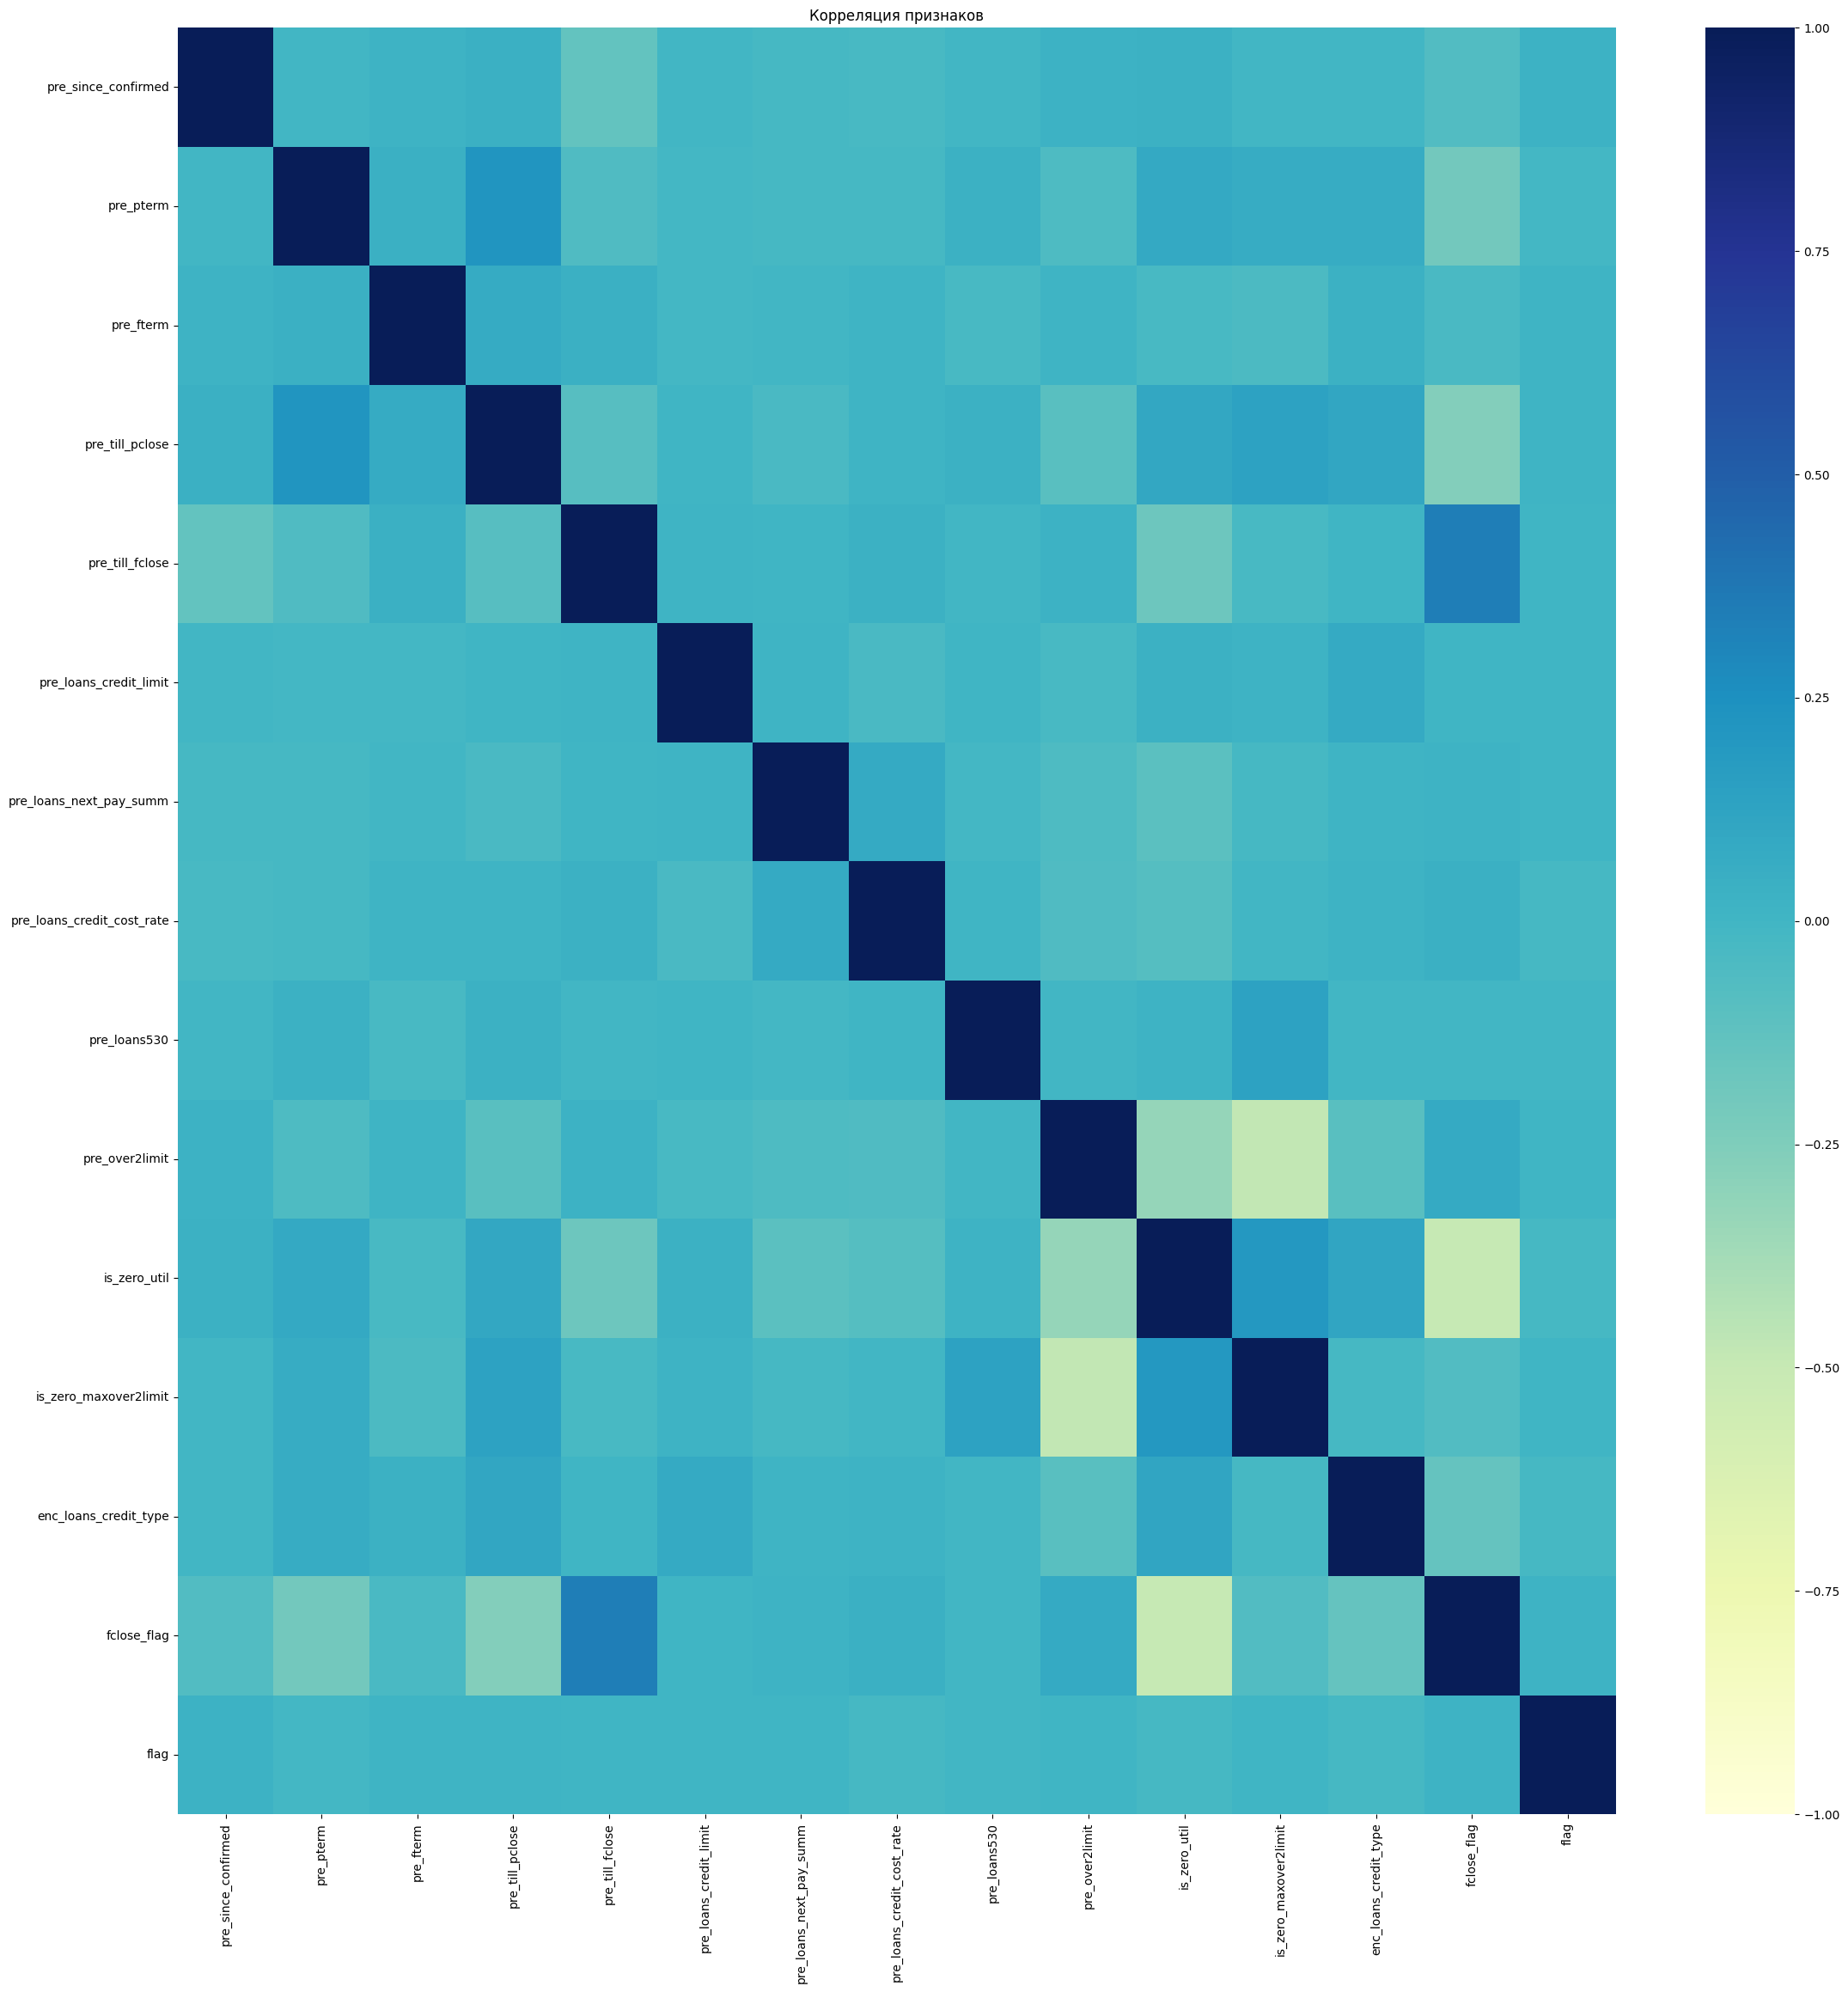

In [397]:
corr_matrix(merged_data.corr())

In [398]:
merged_data.head()

,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_credit_cost_rate,pre_loans530,pre_over2limit,is_zero_util,is_zero_maxover2limit,enc_loans_credit_type,fclose_flag,flag
0,9,2,3,16,10,11,3,11,16,2,1,1,4,0,1
1,9,14,14,12,12,0,3,11,16,2,1,1,4,0,1
2,9,4,8,1,11,11,0,8,16,2,0,1,3,1,1
3,1,9,12,16,7,12,2,4,16,2,1,1,1,0,0
4,12,15,2,11,12,10,2,4,16,2,1,1,4,0,0


In [399]:
#уменьшение выборки для демонстрации работы TPOT и H2O
test_data = merged_data[10000:10250]
train_data = merged_data[:5000]

In [400]:
def x_y_split(df):
    X = df.drop('flag', axis=1)
    y = df['flag']
    return X, y

In [401]:
X, y = x_y_split(train_data)

In [402]:
X_test, y_test = x_y_split(test_data)

In [403]:
def data_scaling(X):
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1))
    X = sc.fit_transform(X)
    return X

In [404]:
X = data_scaling(X)

In [405]:
X

array([[0.52941176, 0.11764706, 0.1875    , ..., 1.        , 0.8       ,
        0.        ],
       [0.52941176, 0.82352941, 0.875     , ..., 1.        , 0.8       ,
        0.        ],
       [0.52941176, 0.23529412, 0.5       , ..., 1.        , 0.6       ,
        1.        ],
       ...,
       [0.47058824, 0.23529412, 0.5       , ..., 0.        , 0.6       ,
        1.        ],
       [0.76470588, 0.64705882, 0.8125    , ..., 1.        , 0.8       ,
        0.        ],
       [0.82352941, 0.41176471, 0.125     , ..., 1.        , 0.8       ,
        0.        ]])

In [406]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучение TPOT

### Функции метрик

In [407]:
def tpot_prediction(test_data):
    y_pred = tpot.predict(test_data)
    y_proba = tpot.predict_proba(test_data)[:, 1]
    return y_pred, y_proba

In [408]:
def metrics(y_test, y_pred, y_proba):
    # Вычисление метрик
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"R2: {r2_score(y_test, y_pred):.2f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC_AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print()
    # Матрица ошибок
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    # Полный отчет
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

### Процесс обучения

In [409]:
%pip install tpot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [410]:
from sklearn import utils
from tpot import TPOTClassifier

In [411]:
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    random_state=42,
    cv=5,
    #n_jobs=1,
    scorers='roc_auc',
)

In [412]:
# Обучение TPOT
tpot.fit(X_train, y_train)

Generation: 100%|██████████| 5/5 [13:01<00:00, 156.34s/it]


TPOTClassifier(cv=5, random_state=42, scorers='roc_auc',
               search_space=<tpot.search_spaces.pipelines.sequential.SequentialPipeline object at 0x00000242A6DBD360>)

In [413]:
# Оценка модели на валидационных данных
y_pred, y_proba = tpot_prediction(X_val)

In [414]:
metrics(y_val, y_pred, y_proba)

RMSE: 0.5944
MAE: 0.3533
R2: -0.48
Accuracy: 0.6467
Precision: 0.5506
Recall: 0.5281
F1-Score: 0.5391
ROC_AUC: 0.7108

Confusion Matrix:
 [[660 253]
 [277 310]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       913
           1       0.55      0.53      0.54       587

    accuracy                           0.65      1500
   macro avg       0.63      0.63      0.63      1500
weighted avg       0.64      0.65      0.65      1500



In [415]:
print(tpot.best_model())

AttributeError: 'TPOTClassifier' object has no attribute 'best_model'

In [ ]:
# Экспорт лучшего пайплайна в виде Python-кода
tpot.export('tpot_pipeline.py')

AttributeError: 'TPOTClassifier' object has no attribute 'export'

In [416]:
# Предсказание на тестовых данных
test_predictions, test_probablity = tpot_prediction(X_test)

In [417]:
metrics(y_test, test_predictions, test_probablity)

RMSE: 0.5899
MAE: 0.3480
R2: -0.46
Accuracy: 0.6520
Precision: 0.6667
Recall: 0.2245
F1-Score: 0.3359
ROC_AUC: 0.5648

Confusion Matrix:
 [[141  11]
 [ 76  22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.93      0.76       152
           1       0.67      0.22      0.34        98

    accuracy                           0.65       250
   macro avg       0.66      0.58      0.55       250
weighted avg       0.66      0.65      0.60       250



## Обучение H2O

In [ ]:
%pip install h2o

In [418]:
import h2o
from h2o.automl import H2OAutoML

In [428]:
# Ячейка 2: Инициализация H2O и загрузка данных
h2o.init(nthreads=-1, max_mem_size="4G", ip="127.0.0.1")

Checking whether there is an H2O instance running at http://127.0.0.1:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.411-b09, mixed mode, sharing)
  Starting server from C:\Users\AntMur00\Desktop\Magister22\LoanStatus\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\AntMur00\AppData\Local\Temp\tmpwcsonncm
  JVM stdout: C:\Users\AntMur00\AppData\Local\Temp\tmpwcsonncm\h2o_AntMur00_started_from_python.out
  JVM stderr: C:\Users\AntMur00\AppData\Local\Temp\tmpwcsonncm\h2o_AntMur00_started_from_python.err


H2OServerError: Server process terminated with error code 1: Invalid maximum heap size: -Xmx4G
The specified size exceeds the maximum representable size.
Error: Could not create the Java Virtual Machine.
Error: A fatal exception has occurred. Program will exit.


In [ ]:
h2o_train_df, h2o_val_df = train_test_split(train_data, test_size=0.3, random_state=42)

In [ ]:
h2o_train_df.shape

In [ ]:
h2o_val_df.shape

In [ ]:
h2o_train_df['flag'] = h2o_train_df['flag'].apply(lambda x: "yes" if x == 1 else "no")
h2o_val_df['flag'] = h2o_val_df['flag'].apply(lambda x: "yes" if x == 1 else "no")
test_data['flag'] = test_data['flag'].apply(lambda x: "yes" if x == 1 else "no")

In [ ]:
# Преобразование в H2O фреймы
train_h2o = h2o.H2OFrame(h2o_train_df)
val_h2o = h2o.H2OFrame(h2o_val_df)
test_h2o = h2o.H2OFrame(test_data)

In [ ]:
# Определение целевой переменной и признаков
target = 'flag'
features = list(train_data.columns)

In [ ]:
train_h2o

In [ ]:
# Запуск H2O AutoML
aml = H2OAutoML(max_runtime_secs=3600, seed=42, verbosity='info', nfolds=5)
aml.train(x=features, y=target, training_frame=train_h2o, validation_frame=val_h2o)


In [ ]:
# Вывод Leaderboard
print("\nLeaderboard:")
print(aml.leaderboard)

In [ ]:
# Получение лучшей модели
best_model = aml.get_best_model()

In [ ]:
# Оценка лучшей модели на валидационных данных
performance = best_model.model_performance(val_h2o)
print("\nModel Performance on Validation Set:")
print(performance)

In [422]:
print(best_model)

NameError: name 'best_model' is not defined

In [ ]:
# Предсказание на тестовых данных
predictions = aml.predict(test_h2o)
predictions_df = predictions.as_data_frame()
print(predictions)

In [420]:
model_path = h2o.save_model(model=best_model, path="/content/h2o_models", force=True)
print(f"Model saved to: {model_path}")

NameError: name 'best_model' is not defined

In [ ]:
h2o.shutdown()